In [1]:
# Imports
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import struct
%matplotlib notebook

### Extracting signals from 8 channels

<IPython.core.display.Javascript object>


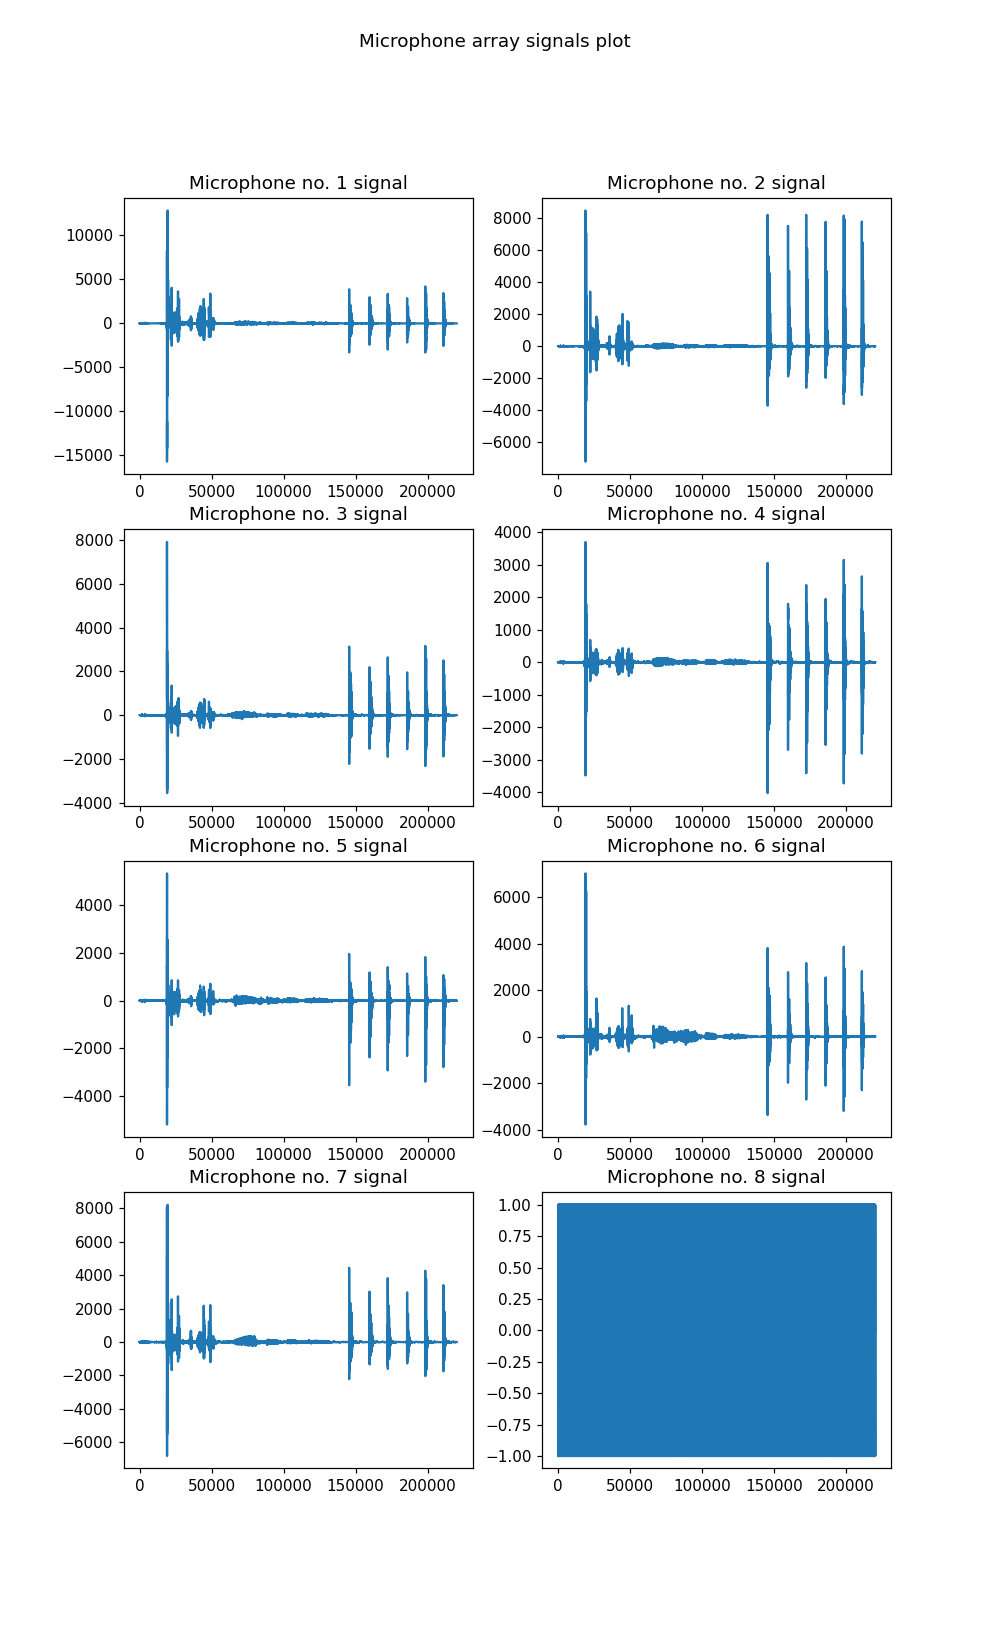

In [28]:
CHUNK = 1024
RATE = 44100
LEN = 5
CHANNELS = 8

p = pyaudio.PyAudio()

stream = p.open(format=pyaudio.paInt16, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)
player = p.open(format=pyaudio.paInt16, channels=1, rate=RATE, output=True, frames_per_buffer=CHUNK)

frames = []

# Read signals for 10 seconds
for i in range(int(LEN * RATE / CHUNK)):
    data = np.frombuffer(stream.read(CHUNK), dtype=np.int16)
    player.write(data, CHUNK)
    frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

#Extract separate channels
samples = len(frames)
frames = np.reshape(frames, -1)
result = np.reshape(frames, (CHANNELS, CHUNK * samples), order='F')
    
# Plot signals from all microphones
fig, ax = plt.subplots(4, 2, figsize=(9,15))
fig.suptitle('Microphone array signals plot')

for c in range(CHANNELS):
    axis = ax[c // 2][c % 2]
    axis.plot(result[c])
    axis.set_title(f'Microphone no. {c+1} signal')

plt.show()

### Live signal plots

In [10]:
mic = pyaudio.PyAudio()

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024

stream = mic.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, output=True, frames_per_buffer=CHUNK)

fig, ax = plt.subplots(figsize=(8,4))

ax.set_ylim(-200, 200)
ax.set_xlim(0, CHUNK)

x = np.arange(0, 2 * CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))

while True:
    try:
        data = stream.read(CHUNK, exception_on_overflow=False)
        data = np.array(struct.unpack(str(2 * CHUNK) + 'B', data), dtype='b')[::2]
        line.set_ydata(data)
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.pause(0.005)
    except KeyboardInterrupt:
        break

stream.stop_stream()
stream.close()
mic.terminate()

<IPython.core.display.Javascript object>